<a href="https://colab.research.google.com/github/AadityaSinha11/R2D2/blob/main/Rice_Mele_Numerical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Parameters
N = 10  # Number of lattice sites
t1 = 0.6 # Intracell hopping parameter
t2 = 1.0  # Intercell hopping parameter
u = 2.0   # Onsite energy parameter

#unit cell size
a = 1


In [ ]:
# Wave vector range
k_values = np.linspace(-np.pi, np.pi, 100)

In [ ]:
# Initialize arrays to store eigenvalues and eigenvectors
eigenvalues_array = np.zeros((len(k_values), N), dtype=complex)
eigenvectors_array = np.zeros((len(k_values), N, N), dtype=complex)

In [ ]:

# Iterate over different values of k
for i, k in enumerate(k_values):
    # Initialize the Hamiltonian matrix
    H = np.zeros((N, N), dtype=complex)

    # Fill the off-diagonal elements
    for j in range(N - 1):
        H[j, j + 1] = t1 + t2 * np.exp(-1j * k)
        H[j + 1, j] = np.conj(H[j, j + 1])

    # Fill the diagonal elements alternately with u and -u
    for j in range(N):
        if j % 2 == 0:
            H[j, j] = u
        else:
            H[j, j] = -u

    # Calculate eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eigh(H)
    eigenvalues_array[i] = eigenvalues
    eigenvectors_array[i] = eigenvectors


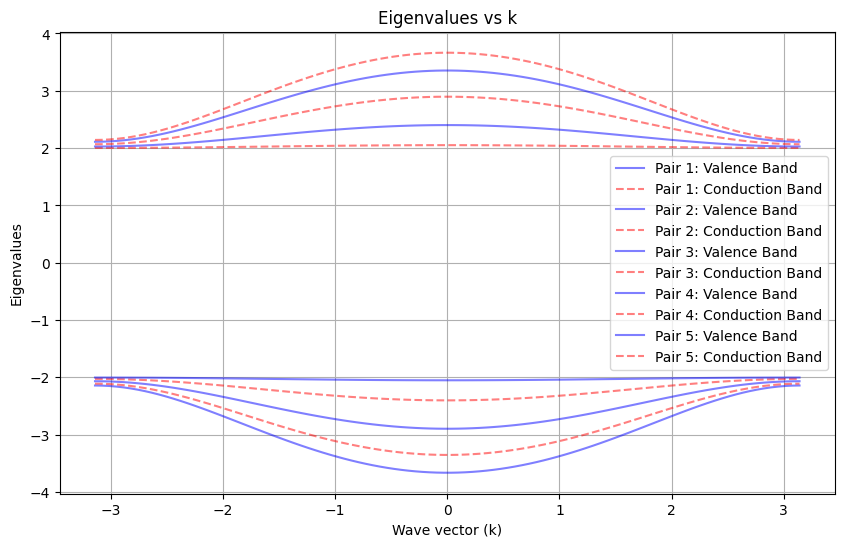

In [ ]:
# Plot eigenvalues vs k
plt.figure(figsize=(10, 6))
for i in range(N // 2):
    valence_band = np.real(eigenvalues_array[:, 2*i])
    conduction_band = np.real(eigenvalues_array[:, 2*i+1])
    plt.plot(k_values, valence_band, color='blue', alpha=0.5, label=f'Pair {i+1}: Valence Band')
    plt.plot(k_values, conduction_band, color='red', linestyle='--', alpha=0.5, label=f'Pair {i+1}: Conduction Band')

plt.title('Eigenvalues vs k')
plt.xlabel('Wave vector (k)')
plt.ylabel('Eigenvalues')
plt.grid(True)
plt.legend()
plt.show()


In [ ]:
# Range of t1/t2 values
t1_t2_values = np.linspace(-2, 2, 130)


In [ ]:
# Initialize an empty list to store polarizations
polarizations = []

$$\phi_k = \arctan \left( \frac{-\delta}{t} \tan \left( \frac{ka}{2} \right) \right) (mod \pi)$$

Referred from *Quantitative relationship between polarization differences and the zone-averaged shift
photocurrent* by Benjamin M. Fregoso, Takahiro Morimoto, and Joel E. Moore, below equation no. D3.


<ipython-input-3-13571a484126>:56: RuntimeWarning: invalid value encountered in arccos
  theta_k_values = np.arccos(u / t1 * np.cos(k_values * a) / 2)


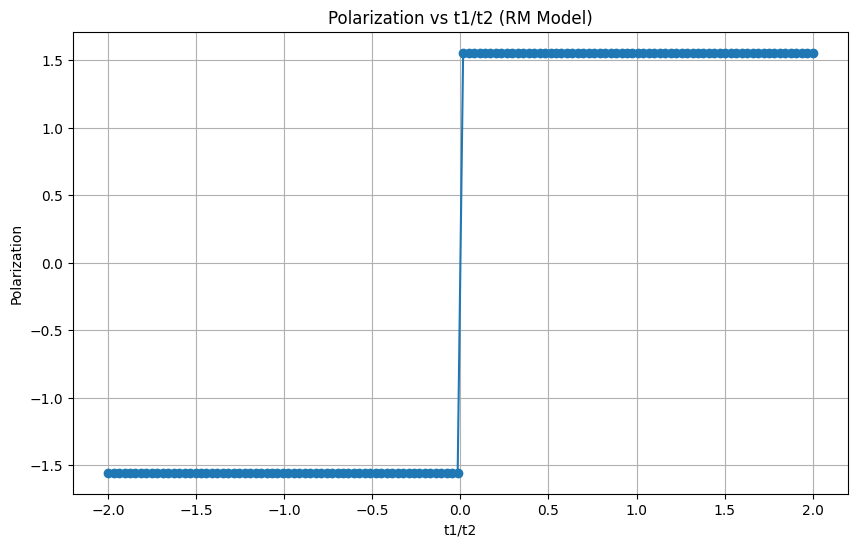

In [ ]:
# Loop over different values of t1/t2
for t1_t2 in t1_t2_values:
    # Parameters
    t2 = 1.0
    t1 = t1_t2 * t2

    # Create a k-vector with higher resolution
    k_values = np.linspace(-np.pi, np.pi, 100)

    # Initialize arrays to store eigenvalues and eigenvectors
    eigenvalues_array = np.zeros((len(k_values), N), dtype=complex)
    eigenvectors_array = np.zeros((len(k_values), N, N), dtype=complex)

    # Calculate eigenvalues and eigenvectors for each k
    for i, k_val in enumerate(k_values):
        # Create Hamiltonian matrix for current k
        H = np.zeros((N, N), dtype=complex)
        # Fill the off-diagonal elements
        for j in range(N - 1):
            H[j, j + 1] = t1 + t2 * np.exp(-1j * k_val)
            H[j + 1, j] = np.conj(H[j, j + 1])

        # Fill the diagonal elements alternately with u and -u
        for j in range(N):
            if j % 2 == 0:
                H[j, j] = u
            else:
                H[j, j] = -u
        # Calculate eigenvalues and eigenvectors
        eigenvalues, eigenvectors = np.linalg.eigh(H)
        eigenvalues_array[i] = eigenvalues
        eigenvectors_array[i] = eigenvectors

    # Calculate phi(k)
    phi_k_values = np.arctan((-t2 / t1) * np.tan(k_values * a / 2))

    # Calculate theta (polar angle)
    theta_k_values = np.arccos(u / t1 * np.cos(k_values * a) / 2)

    # Compute the gradient of phi(k) with respect to k
    gradient_phi_k = np.gradient(phi_k_values, k_values)

    # Compute the Berry connection A
    A = -0.5 * gradient_phi_k

    # Integrate A over the Brillouin zone to compute polarization
    polarization = np.trapz(A, dx=(2 * np.pi) / len(k_values))

    # Append polarization to the list
    polarizations.append(polarization)

# Plot polarization vs t1/t2
plt.figure(figsize=(10, 6))
plt.plot(t1_t2_values, polarizations, marker='o', linestyle='-')
plt.title('Polarization vs t1/t2 (RM Model)')
plt.xlabel('t1/t2')
plt.ylabel('Polarization')
plt.grid(True)
plt.show()



$$e\int_{BZ} A_{nn} = P_n$$

Referred from *Quantitative relationship between polarization differences and the zone-averaged shift
photocurrent* by Benjamin M. Fregoso, Takahiro Morimoto, and Joel E. Moore,

[equation no. 5].

Used The different Eigenvectors $A_{cc}$ and $A_{vv}$ to compute $P_c$ and $P_v$

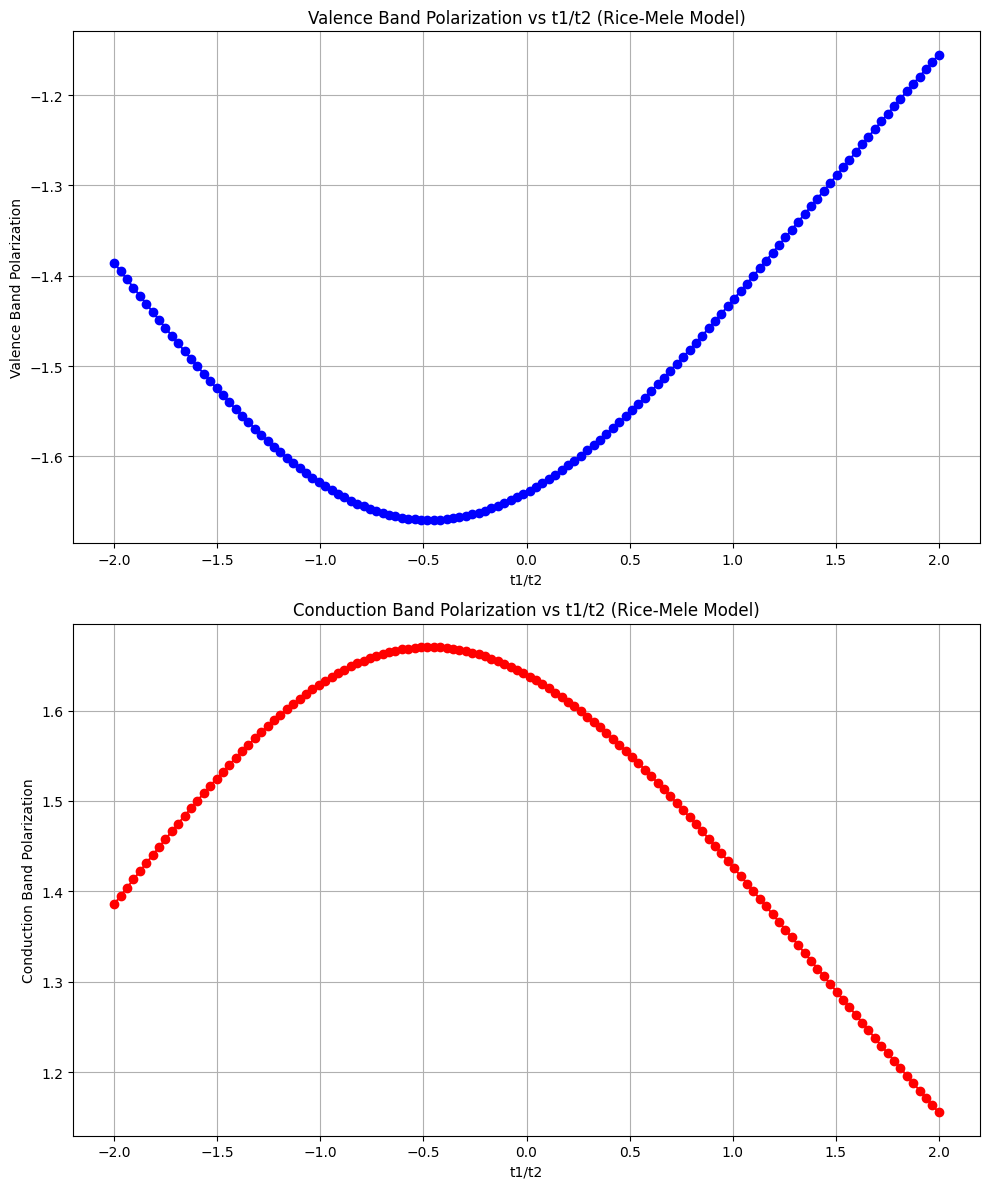

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
N = 100  # Number of lattice sites in unit cell for simplicity

# Onsite energy
u = 2

# Unit cell length
a = 1

# Range of t1/t2 values
t1_t2_values = np.linspace(-2, 2, 130)

# Initialize lists to store polarizations
polarizations_conduction = []
polarizations_valence = []

# Loop over different values of t1/t2
for t1_t2 in t1_t2_values:
    # Parameters
    t2 = 1.0
    t1 = t1_t2 * t2

    # Create a k-vector with higher resolution
    k_values = np.linspace(-np.pi, np.pi, 100)

    # Initialize arrays to store Berry connections
    A_conduction = np.zeros_like(k_values, dtype=float)
    A_valence = np.zeros_like(k_values, dtype=float)

    # Loop over k-values
    for i, k in enumerate(k_values):
        # Construct the Hamiltonian matrix for the Rice-Mele model
        H = np.array([[u, t1 + t2 * np.exp(-1j * k)],
                      [t1 + t2 * np.exp(1j * k), -u]], dtype=complex)

        # Diagonalize the Hamiltonian
        eigenvalues, eigenvectors = np.linalg.eigh(H)

        # Identify conduction and valence bands
        valence_band_idx = 0 if eigenvalues[0].real < 0 else 1
        conduction_band_idx = 1 - valence_band_idx

        # Gradient of eigenstates with respect to k
        grad_u_valence = np.gradient(eigenvectors[:, valence_band_idx], k_values[i])
        grad_u_conduction = np.gradient(eigenvectors[:, conduction_band_idx], k_values[i])

        # Berry connection for valence band
        A_valence[i] = np.imag(np.vdot(eigenvectors[:, valence_band_idx], grad_u_valence))

        # Berry connection for conduction band
        A_conduction[i] = np.imag(np.vdot(eigenvectors[:, conduction_band_idx], grad_u_conduction))

    # Integrate Berry connections over the Brillouin zone to compute polarizations
    polarization_valence = np.trapz(A_valence, dx=(2 * np.pi) / len(k_values))
    polarization_conduction = np.trapz(A_conduction, dx=(2 * np.pi) / len(k_values))

    # Append polarizations to the lists
    polarizations_valence.append(polarization_valence)
    polarizations_conduction.append(polarization_conduction)

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

# Plot valence band polarization vs t1/t2
ax1.plot(t1_t2_values, polarizations_valence, marker='o', linestyle='-', color='b')
ax1.set_title('Valence Band Polarization vs t1/t2 (Rice-Mele Model)')
ax1.set_xlabel('t1/t2')
ax1.set_ylabel('Valence Band Polarization')
ax1.grid(True)

# Plot conduction band polarization vs t1/t2
ax2.plot(t1_t2_values, polarizations_conduction, marker='o', linestyle='-', color='r')
ax2.set_title('Conduction Band Polarization vs t1/t2 (Rice-Mele Model)')
ax2.set_xlabel('t1/t2')
ax2.set_ylabel('Conduction Band Polarization')
ax2.grid(True)

# Show the plots
plt.tight_layout()
plt.show()


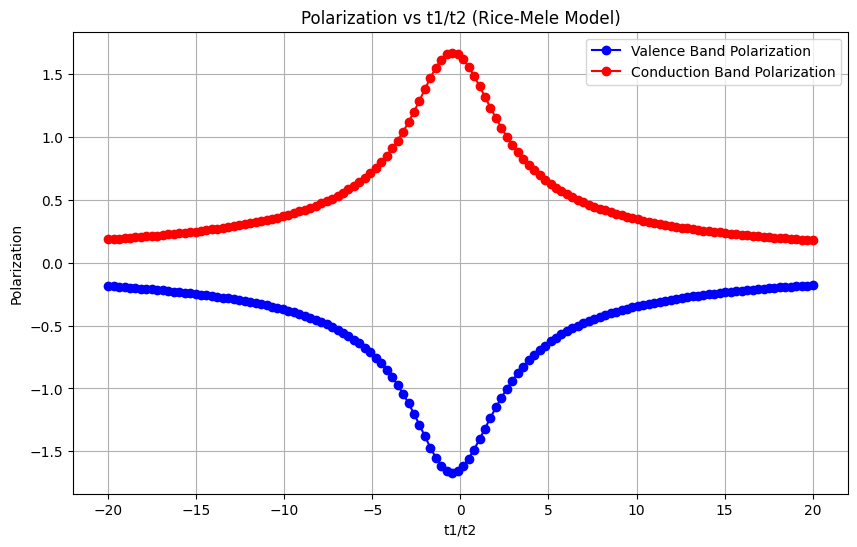

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
N = 10  # Number of lattice sites in unit cell for simplicity

# Onsite energy
u = 2

# Unit cell length
a = 1

# Range of t1/t2 values
t1_t2_values = np.linspace(-20, 20, 130)

# Initialize lists to store polarizations
polarizations_conduction = []
polarizations_valence = []

# Loop over different values of t1/t2
for t1_t2 in t1_t2_values:
    # Parameters
    t2 = 1.0
    t1 = t1_t2 * t2

    # Create a k-vector with higher resolution
    k_values = np.linspace(-np.pi, np.pi, 100)

    # Initialize arrays to store Berry connections
    A_conduction = np.zeros_like(k_values, dtype=float)
    A_valence = np.zeros_like(k_values, dtype=float)

    # Loop over k-values
    for i, k in enumerate(k_values):
        # Construct the Hamiltonian matrix for the Rice-Mele model
        H = np.array([[u, t1 + t2 * np.exp(-1j * k)],
                      [t1 + t2 * np.exp(1j * k), -u]], dtype=complex)

        # Diagonalize the Hamiltonian
        eigenvalues, eigenvectors = np.linalg.eigh(H)

        # Identify conduction and valence bands
        valence_band_idx = 0 if eigenvalues[0].real < 0 else 1
        conduction_band_idx = 1 - valence_band_idx

        # Gradient of eigenstates with respect to k
        grad_u_valence = np.gradient(eigenvectors[:, valence_band_idx], k_values[i])
        grad_u_conduction = np.gradient(eigenvectors[:, conduction_band_idx], k_values[i])

        # Berry connection for valence band
        A_valence[i] = np.imag(np.vdot(eigenvectors[:, valence_band_idx], grad_u_valence))

        # Berry connection for conduction band
        A_conduction[i] = np.imag(np.vdot(eigenvectors[:, conduction_band_idx], grad_u_conduction))

    # Integrate Berry connections over the Brillouin zone to compute polarizations
    polarization_valence = np.trapz(A_valence, dx=(2 * np.pi) / len(k_values))
    polarization_conduction = np.trapz(A_conduction, dx=(2 * np.pi) / len(k_values))

    # Append polarizations to the lists
    polarizations_valence.append(polarization_valence)
    polarizations_conduction.append(polarization_conduction)

# Plot valence and conduction band polarizations vs t1/t2 in the same plot
plt.figure(figsize=(10, 6))
plt.plot(t1_t2_values, polarizations_valence, marker='o', linestyle='-', color='b', label='Valence Band Polarization')
plt.plot(t1_t2_values, polarizations_conduction, marker='o', linestyle='-', color='r', label='Conduction Band Polarization')
plt.title('Polarization vs t1/t2 (Rice-Mele Model)')
plt.xlabel('t1/t2')
plt.ylabel('Polarization')
plt.grid(True)
plt.legend()
plt.show()


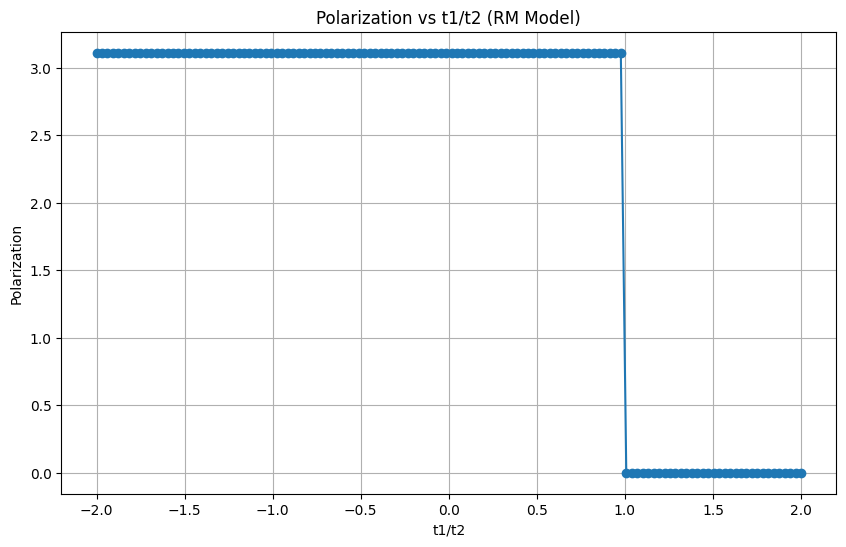

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
N = 10  # Number of lattice sites

# Onsite energy
u = 2

# Unit cell length
a = 1

# Range of t1/t2 values
t1_t2_values = np.linspace(-2, 2, 130)

# Initialize an empty list to store polarizations
polarizations = []

# Loop over different values of t1/t2
for t1_t2 in t1_t2_values:
    # Parameters
    t2 = 1.0
    t1 = t1_t2 * t2

    # Create a k-vector with higher resolution
    k_values = np.linspace(-np.pi, np.pi, 100)

    # Initialize arrays to store eigenvalues and eigenvectors
    eigenvalues_array = np.zeros((len(k_values), N), dtype=complex)
    eigenvectors_array = np.zeros((len(k_values), N, N), dtype=complex)

    # Calculate eigenvalues and eigenvectors for each k
    for i, k_val in enumerate(k_values):
        # Create Hamiltonian matrix for current k
        H = np.zeros((N, N), dtype=complex)
        # Fill the off-diagonal elements
        for j in range(N - 1):
            H[j, j + 1] = t1 + t2 * np.exp(-1j * k_val)
            H[j + 1, j] = np.conj(H[j, j + 1])

        # Fill the diagonal elements alternately with u and -u
        for j in range(N):
            if j % 2 == 0:
                H[j, j] = u
            else:
                H[j, j] = -u
        # Calculate eigenvalues and eigenvectors
        eigenvalues, eigenvectors = np.linalg.eigh(H)
        eigenvalues_array[i] = eigenvalues
        eigenvectors_array[i] = eigenvectors

    # Calculate phi(k) using the new formula
    term = t1 + t2 * np.exp(-1j * k_values)
    phi_k_values = -1j * (np.log(term) - np.log(np.abs(term)))

    # Compute the gradient of phi(k) with respect to k
    gradient_phi_k = np.gradient(phi_k_values, k_values)

    # Compute the Berry connection A
    A = -0.5 * gradient_phi_k

    # Integrate A over the Brillouin zone to compute polarization
    polarization = np.trapz(A, dx=(2 * np.pi) / len(k_values))

    # Append polarization to the list
    polarizations.append(np.real(polarization))  # Take the real part for plotting

# Plot polarization vs t1/t2
plt.figure(figsize=(10, 6))
plt.plot(t1_t2_values, polarizations, marker='o', linestyle='-')
plt.title('Polarization vs t1/t2 (RM Model)')
plt.xlabel('t1/t2')
plt.ylabel('Polarization')
plt.grid(True)
plt.show()
